<a href="https://colab.research.google.com/github/shaviram99/Retail-Sales/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About**

**About Dataset**

**Context**

The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

**Content**

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

**The Task**

1. Predict the department-wide sales for each store for the following year
2. Model the effects of markdowns on holiday weeks
3. Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

# **Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn as sk
import datetime
import plotly.express as px
import statsmodels.api as sm

from pandas.plotting import scatter_matrix
# from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
# from sklearn.preprocessing import MinMaxScaler  # Transform features by scaling each feature to a given range  #Sensitive with outlier, scaling using Min (0) and Max (1), Result between range 0 and 1
# from sklearn.preprocessing import StandardScaler# Transform features by scaling each feature to a given range  #Standard deviation, count range from mean to standard deviation
# from sklearn.preprocessing import RobustScaler  # Transform features by scaling each feature to a given range  #If there is any outlier we can use RobustScaler
# from sklearn import cluster                     # library that contains algorithms for segmenting
# from silhoutte import silhoutte_analysis        # used to study the separation distance between the resulting clusters

# **Load Dataset**

## Dictionary

**Stores**

Anonymized information about the 45 stores, indicating the type and size of store

**Features**

Contains additional data related to the store, department, and regional activity for the given dates.



*   Store - the store number
*   Date - the week
*   Temperature - average temperature in the region
*   Fuel_Price - cost of fuel in the region
*   MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown *  data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
*   CPI - the consumer price index
*   Unemployment - the unemployment rate
*   IsHoliday - whether the week is a special holiday week



**Sales**

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

*   Store - the store number
*   Dept - the department number
*   Date - the week
*   Weekly_Sales -  sales for the given department in the given store
*   IsHoliday - whether the week is a special holiday week

## Dataset

In [ ]:
url1 = 'https://raw.githubusercontent.com/shaviram99/Retail-Sales/main/Features%20data%20set.csv'
df_features = pd.read_csv(url1)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
url2 = 'https://raw.githubusercontent.com/shaviram99/Retail-Sales/main/sales%20data-set.csv'
df_sales = pd.read_csv(url2)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
url3 = 'https://raw.githubusercontent.com/shaviram99/Retail-Sales/main/stores%20data-set.csv'
df_stores = pd.read_csv(url3)
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


## Merge dataset


In [ ]:
df_1 = pd.merge(df_stores, df_sales, on='Store')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 22.9+ MB


In [ ]:
df_1.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False


In [ ]:
df_final=pd.merge(df_features,df_1, on=('Store', 'Date', 'IsHoliday'))
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
df_final.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


# **DATA CLEANING**

In [ ]:
df_final2= df_final.copy()

In [ ]:
df_final2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


## I. Removing Duplicate

In [ ]:
#Duplicate not found in dataset
df_final2.duplicated().sum()

0

## II. Removing Irrelevant Value

In [ ]:
#Check typos
for i in df_final2.columns:
  unique_data = df_final2[i].value_counts()
  print(unique_data,'\n')

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64 

23/12/2011    3027
25/11/2011    3021
16/12/2011    3013
09/12/2011    3010
17/02/2012    3007
              ... 
09/07/2010    2903
16/07/2010    2901
20/08/2010    2901
27/08/2010    2898
13/08/2010    2896
Name: Date, Length: 143, dtype: int64 

50.43    709
67.87    646
72.62    594
76.67    583
70.28    563
        ... 
56.50     41
55.47     40
58.40     40
66.79     39
64.09     38
Name: Temperature, Length: 3528, dtype: 

## III. Handling Missing Value


In [ ]:
# to check missing values
df_final2.isna().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
dtype: int64

In [ ]:
# fill missing value with '0'
df_final2[['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5']]=df_final2[['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5']].fillna(0)

In [ ]:
df_final2.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Dept            0
Weekly_Sales    0
dtype: int64

In [ ]:
df_final2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38


## IV. Convert Datatype


In [ ]:
df_dtype=df_final2.copy()

In [ ]:
df_dtype.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
df_dtype['Date'] = pd.to_datetime(df_dtype['Date'])
df_dtype[['Store', 'Dept']] = df_dtype[['Store', 'Dept']].astype(str) 
df_dtype.info()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\3657391607.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_dtype['Date'] = pd.to_datetime(df_dtype['Date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  object        
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  object        
 15  Weekly_Sales  421

In [ ]:
df_dtype.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38


In [ ]:
#to change column name 'date' to 'date_transaction
df_dtype.rename(columns = {'Date' : 'Date_tranx'}, inplace=True)
df_dtype.head()

,Store,Date_tranx,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38


## VI. Handling Outlier


In [ ]:
df_dtype1=df_dtype.copy()

In [ ]:
df_dtype1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  object        
 1   Date_tranx    421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  object        
 15  Weekly_Sales  421

### By Boxplot


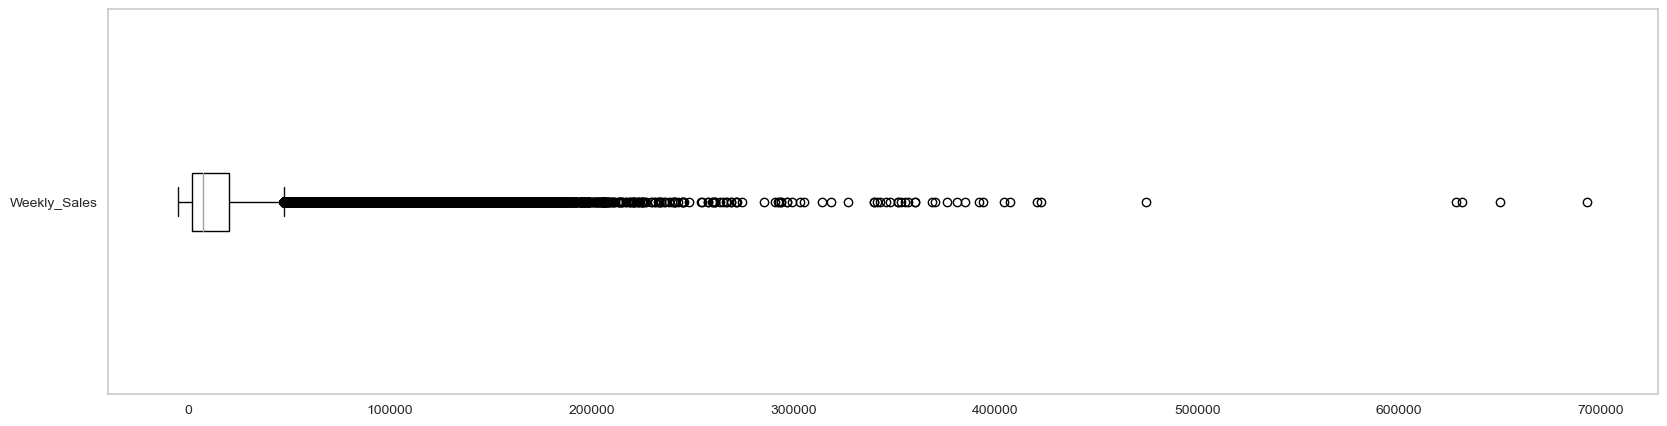

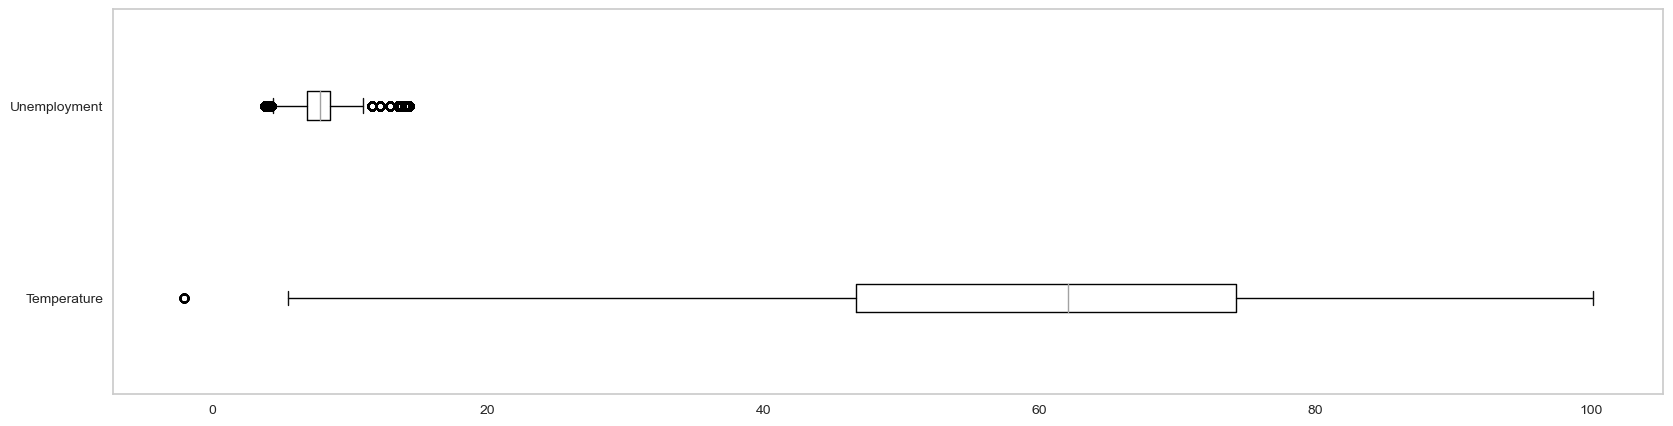

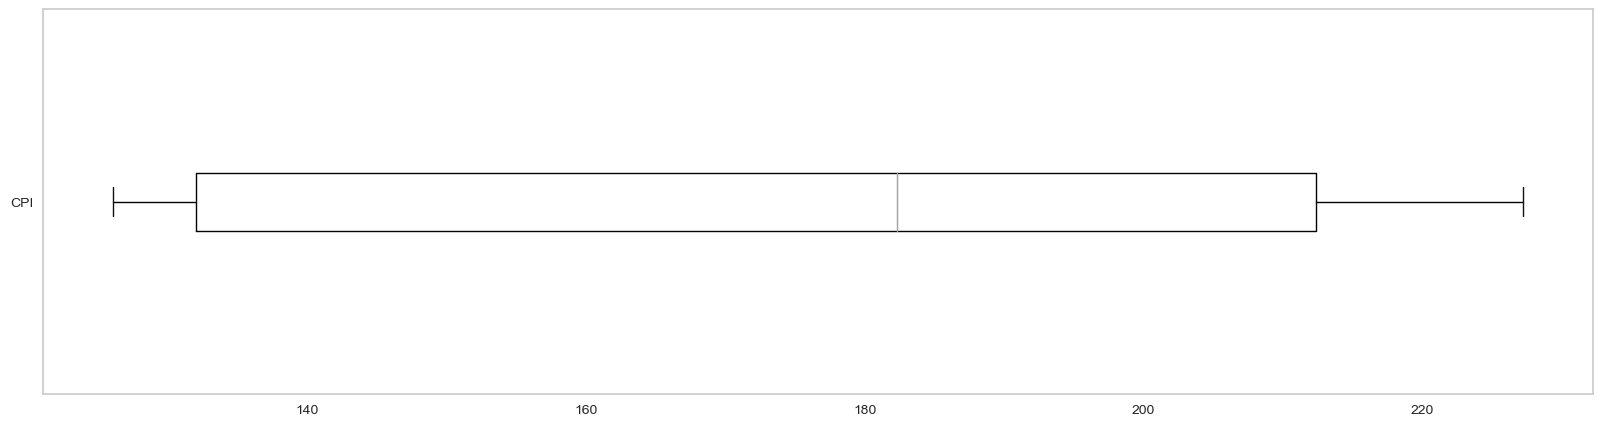

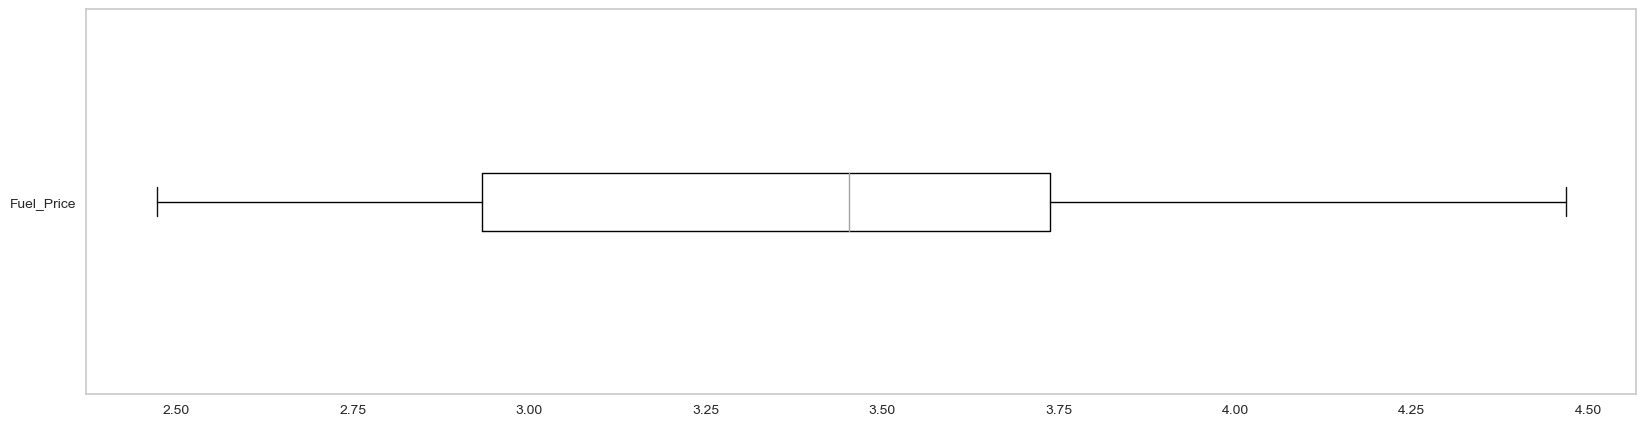

In [ ]:
# Creat boxplot to see outlier 
df_dtype1.boxplot(column=['Weekly_Sales'], fontsize=10, rot=0, grid=False, figsize=(20,5), vert=False)
plt.show()
df_dtype1.boxplot(column=['Temperature','Unemployment'], fontsize=10, rot=0, grid=False, figsize=(20,5), vert=False)
plt.show()
df_dtype1.boxplot(column=['CPI'], fontsize=10, rot=0, grid=False, figsize=(20,5), vert=False)
plt.show()
df_dtype1.boxplot(column=['Fuel_Price'], fontsize=10, rot=0, grid=False, figsize=(20,5), vert=False)
plt.show()

Too many outliers on weekly sales and some outlier on 'Temperature','Unemployment'


### By Upper Lower Fence


#### Weekly_Sales


In [ ]:
df_dtype1_outlier = df_dtype1.copy()

In [ ]:
#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1Weekly_Sales = df_dtype1_outlier['Weekly_Sales'].quantile(0.25)
Q3Weekly_Sales = df_dtype1_outlier['Weekly_Sales'].quantile(0.75)

IQRWeekly_Sales = Q3Weekly_Sales - Q1Weekly_Sales
lower_fence_Weekly_Sales = Q1Weekly_Sales - 1.5 * IQRWeekly_Sales
upper_fence_Weekly_Sales = Q3Weekly_Sales + 1.5 * IQRWeekly_Sales

print('Q1Weekly_Sale:', Q1Weekly_Sales)
print('Q3Weekly_Sale:', Q3Weekly_Sales)
print('IQRWeekly_Sale:', IQRWeekly_Sales)
print('Lower Fence Weekly_Sale:', lower_fence_Weekly_Sales)
print('Upper Fence Weekly_Sale:', upper_fence_Weekly_Sales)

Q1Weekly_Sale: 2079.6499999999996
Q3Weekly_Sale: 20205.8525
IQRWeekly_Sale: 18126.2025
Lower Fence Weekly_Sale: -25109.653749999998
Upper Fence Weekly_Sale: 47395.15625


In [ ]:
#to know percentage of outlier
df_sales_begin = len(df_dtype1)
Weekly_Sales_outlier = len(df_dtype1_outlier[(df_dtype1_outlier['Weekly_Sales']<lower_fence_Weekly_Sales) | (df_dtype1_outlier['Weekly_Sales']>upper_fence_Weekly_Sales)])

print('Data before remove outlier: ', df_sales_begin)
print('Number of outlier: ', Weekly_Sales_outlier)
print('Percentage of outlier: ', round(Weekly_Sales_outlier/df_sales_begin*100,2), '%')


Data before remove outlier:  421570
Number of outlier:  35521
Percentage of outlier:  8.43 %


we got the percentage of outlier is 8.43 %, this is a small number of percentage so drop the outlier


In [ ]:

Weekly_Sale_lower_out = df_dtype1_outlier['Weekly_Sales']<lower_fence_Weekly_Sales
Weekly_Sale_upper_out = df_dtype1_outlier['Weekly_Sales']>upper_fence_Weekly_Sales
df_dtype1_outlier = df_dtype1_outlier.loc[~(Weekly_Sale_lower_out | Weekly_Sale_upper_out)]

df_dtype1_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386049 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         386049 non-null  object        
 1   Date_tranx    386049 non-null  datetime64[ns]
 2   Temperature   386049 non-null  float64       
 3   Fuel_Price    386049 non-null  float64       
 4   MarkDown1     386049 non-null  float64       
 5   MarkDown2     386049 non-null  float64       
 6   MarkDown3     386049 non-null  float64       
 7   MarkDown4     386049 non-null  float64       
 8   MarkDown5     386049 non-null  float64       
 9   CPI           386049 non-null  float64       
 10  Unemployment  386049 non-null  float64       
 11  IsHoliday     386049 non-null  bool          
 12  Type          386049 non-null  object        
 13  Size          386049 non-null  int64         
 14  Dept          386049 non-null  object        
 15  Weekly_Sales  386

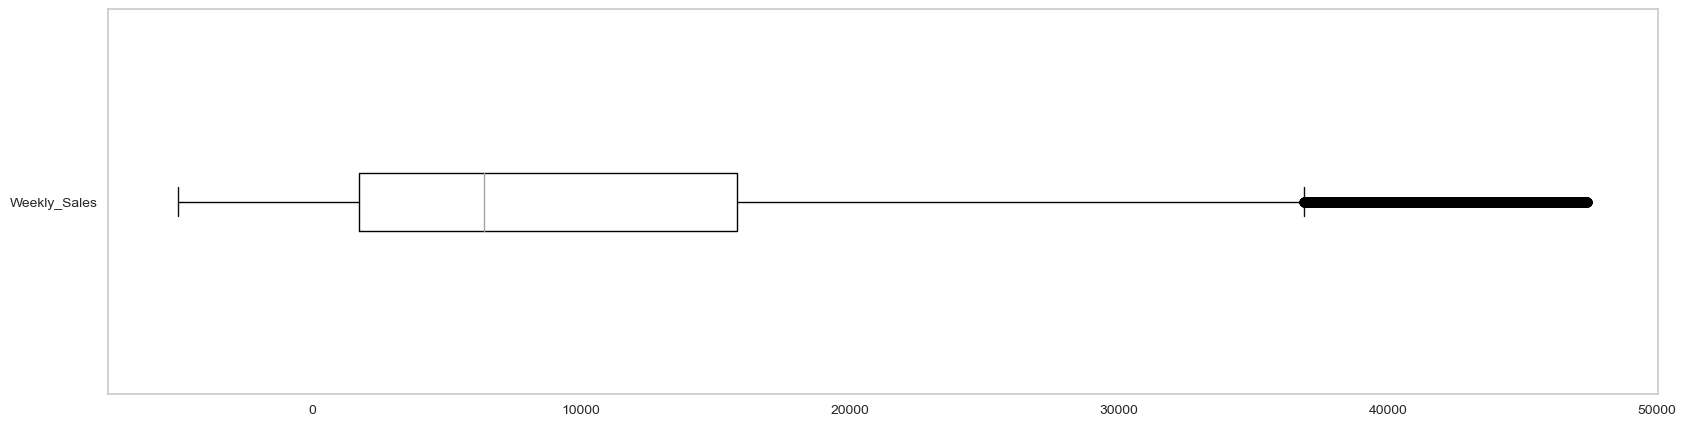

In [ ]:

# boxplot clean data
df_dtype1_outlier.boxplot(column=['Weekly_Sales'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)
plt.show()


#### Temperature


In [ ]:
df_dtype1_outlier2 = df_dtype1_outlier.copy()


In [ ]:
#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1temp = df_dtype1_outlier2['Temperature'].quantile(0.25)
Q3temp = df_dtype1_outlier2['Temperature'].quantile(0.75)

IQRtemp = Q3temp - Q1temp
lower_fence_temp = Q1temp - 1.5 * IQRtemp
upper_fence_temp = Q3temp + 1.5 * IQRtemp

print('Q1temp:', Q1temp)
print('Q3temp:', Q3temp)
print('IQRtemp:', IQRtemp)
print('Lower Fence temp:', lower_fence_temp)
print('Upper Fence temp:', upper_fence_temp)


Q1temp: 46.66
Q3temp: 74.25
IQRtemp: 27.590000000000003
Lower Fence temp: 5.2749999999999915
Upper Fence temp: 115.635


In [ ]:
#to know percentage of outlier
df_temp_begin = len(df_dtype1)
temp_outlier = len(df_dtype1_outlier2[(df_dtype1_outlier2['Temperature']<lower_fence_temp) | (df_dtype1_outlier2['Temperature']>upper_fence_temp)])

print('Data before remove outlier: ', df_temp_begin)
print('Number of outlier (weekly sales+temp): ', temp_outlier+Weekly_Sales_outlier)
print('Percentage of outlier: ', round((temp_outlier+Weekly_Sales_outlier)/df_temp_begin*100,2), '%')


Data before remove outlier:  421570
Number of outlier (weekly sales+temp):  35589
Percentage of outlier:  8.44 %


we got the percentage of outlier (weekly sales+temp) is 8.44 %, this is a small number of percentage so drop the outlier


In [ ]:
temp_lower_out = df_dtype1_outlier2['Temperature']<lower_fence_temp
temp_upper_out = df_dtype1_outlier2['Temperature']>upper_fence_temp
df_dtype1_outlier2 = df_dtype1_outlier2.loc[~(temp_lower_out | temp_upper_out)]

df_dtype1_outlier2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 385981 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         385981 non-null  object        
 1   Date_tranx    385981 non-null  datetime64[ns]
 2   Temperature   385981 non-null  float64       
 3   Fuel_Price    385981 non-null  float64       
 4   MarkDown1     385981 non-null  float64       
 5   MarkDown2     385981 non-null  float64       
 6   MarkDown3     385981 non-null  float64       
 7   MarkDown4     385981 non-null  float64       
 8   MarkDown5     385981 non-null  float64       
 9   CPI           385981 non-null  float64       
 10  Unemployment  385981 non-null  float64       
 11  IsHoliday     385981 non-null  bool          
 12  Type          385981 non-null  object        
 13  Size          385981 non-null  int64         
 14  Dept          385981 non-null  object        
 15  Weekly_Sales  385

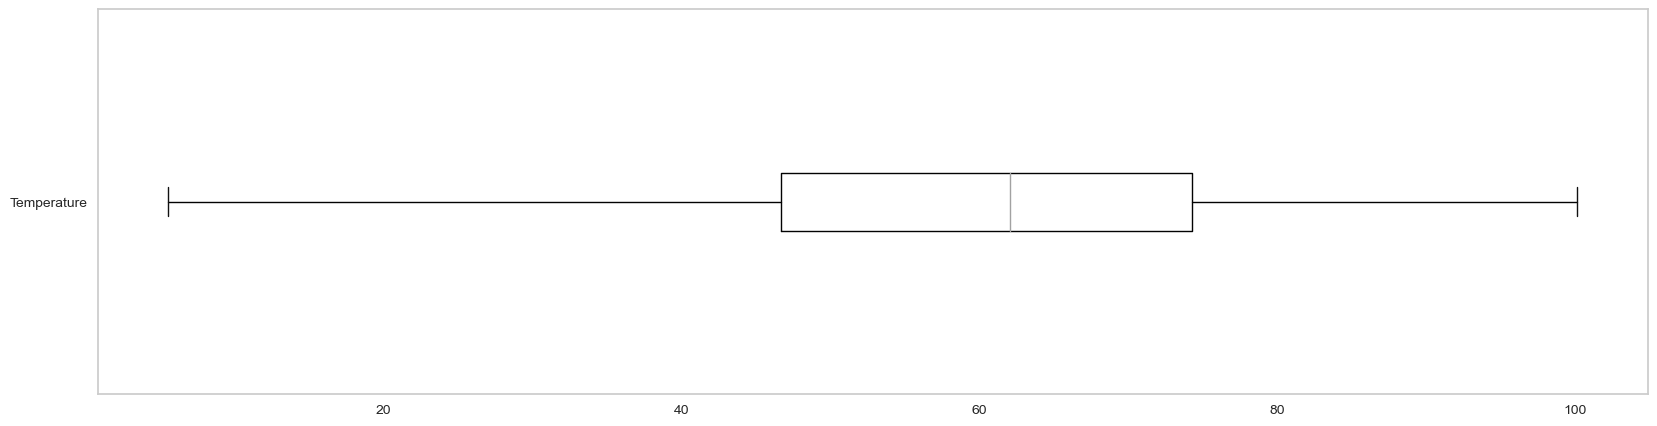

In [ ]:
# boxplot clean data
df_dtype1_outlier2.boxplot(column=['Temperature'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)
plt.show()


#### Unemployed


In [ ]:
df_dtype1_outlier3 = df_dtype1_outlier2.copy()


In [ ]:
#check oulier with Q1 and Q3 ( that value < Q1 - 1,5 IQR and > Q3 + 1,5 IQR)
Q1Unemployment = df_dtype1_outlier3['Unemployment'].quantile(0.25)
Q3Unemployment= df_dtype1_outlier3['Unemployment'].quantile(0.75)

IQRUnemployment = Q3Unemployment - Q1Unemployment
lower_fence_Unemployment = Q1Unemployment - 1.5 * IQRUnemployment
upper_fence_Unemployment = Q3Unemployment + 1.5 * IQRUnemployment

print('Q1Unemployment:', Q1Unemployment)
print('Q3Unemployment:', Q3Unemployment)
print('IQRUnemployment:', IQRUnemployment)
print('Lower Fence Unemployment:', lower_fence_Unemployment)
print('Upper Fence Unemployment:', upper_fence_Unemployment)

Q1Unemployment: 6.885
Q3Unemployment: 8.595
IQRUnemployment: 1.7100000000000009
Lower Fence Unemployment: 4.3199999999999985
Upper Fence Unemployment: 11.160000000000002


In [ ]:

#to know percentage of outlier
df_Unemployment_begin = len(df_dtype1)
Unemployment_outlier = len(df_dtype1_outlier3[(df_dtype1_outlier3['Unemployment']<lower_fence_Unemployment) | (df_dtype1_outlier3['Unemployment']>upper_fence_Unemployment)])

print('Data before remove outlier: ', df_Unemployment_begin)
print('Number of outlier (weekly sales+temp+Unemployment): ', temp_outlier+Weekly_Sales_outlier+Unemployment_outlier)
print('Percentage of outlier: ', round((temp_outlier+Weekly_Sales_outlier+Unemployment_outlier)/df_Unemployment_begin*100,2), '%')


Data before remove outlier:  421570
Number of outlier (weekly sales+temp+Unemployment):  65259
Percentage of outlier:  15.48 %



we got the percentage of outlier (weekly sales+temp+Unemployment) is 15.48 %, this is a big number of percentage so dont drop the outlier

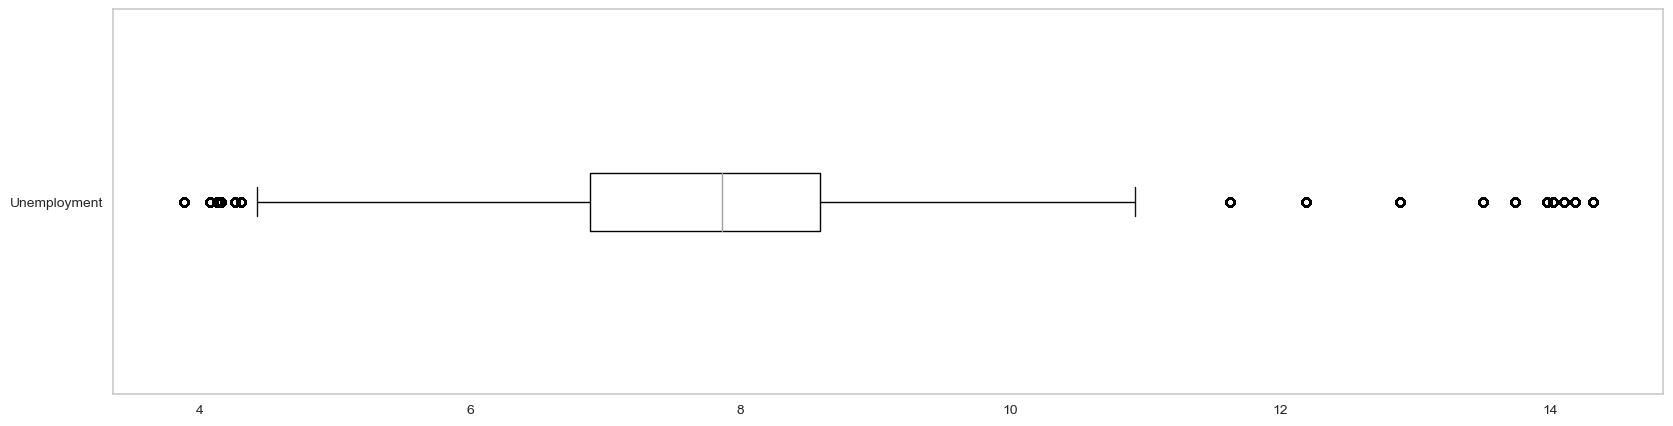

In [ ]:

# boxplot clean data
df_dtype1_outlier3.boxplot(column=['Unemployment'], fontsize=10,rot=0,grid=False,figsize=(20,5),vert=False)
plt.show()

# Save File

In [ ]:
# df_dtype1_outlier3.info()

In [ ]:
# df_clean=df_dtype1_outlier3.copy()
# df_clean = df_clean.to_csv(r'C:\Users\LENOVO\Documents\revou\Portofolio\sales\final_clean_new.csv', index=False, header=True) 
# print(df_clean)

# Statistical Description

In [ ]:
df_dtype1_outlier3.head()

,Store,Date_tranx,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38
5,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,6,5749.03


In [ ]:
dfcleaned= df_dtype1_outlier3.copy()
dfcleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385981 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         385981 non-null  object        
 1   Date_tranx    385981 non-null  datetime64[ns]
 2   Temperature   385981 non-null  float64       
 3   Fuel_Price    385981 non-null  float64       
 4   MarkDown1     385981 non-null  float64       
 5   MarkDown2     385981 non-null  float64       
 6   MarkDown3     385981 non-null  float64       
 7   MarkDown4     385981 non-null  float64       
 8   MarkDown5     385981 non-null  float64       
 9   CPI           385981 non-null  float64       
 10  Unemployment  385981 non-null  float64       
 11  IsHoliday     385981 non-null  bool          
 12  Type          385981 non-null  object        
 13  Size          385981 non-null  int64         
 14  Dept          385981 non-null  object        
 15  Weekly_Sales  385

In [ ]:
dfcleaned.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales
count,385981.000000,385981.000000,385981.000000,385981.000000,385981.000000,385981.000000,385981.000000,385981.000000,385981.000000,385981.000000,385981.000000
mean,60.073072,3.361276,2529.932475,856.561980,434.594124,1050.844843,1615.551183,171.279147,7.971808,133759.546384,10544.959957
std,18.476641,0.459046,5962.523454,4952.382729,5259.350635,3823.615030,4106.576001,39.173228,1.876951,60976.612424,11327.290609
min,5.540000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,-4988.940000
25%,46.670000,2.932000,0.000000,0.000000,0.000000,0.000000,0.000000,132.106200,6.885000,93188.000000,1756.080000
50%,62.070000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.431557,7.866000,128107.000000,6373.640000
75%,74.250000,3.738000,2683.990000,1.750000,4.090000,407.170000,2099.050000,212.576205,8.595000,202307.000000,15803.100000
max,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,47393.430000


# Corelation

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\2472346909.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfcleaned.corr()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\2472346909.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


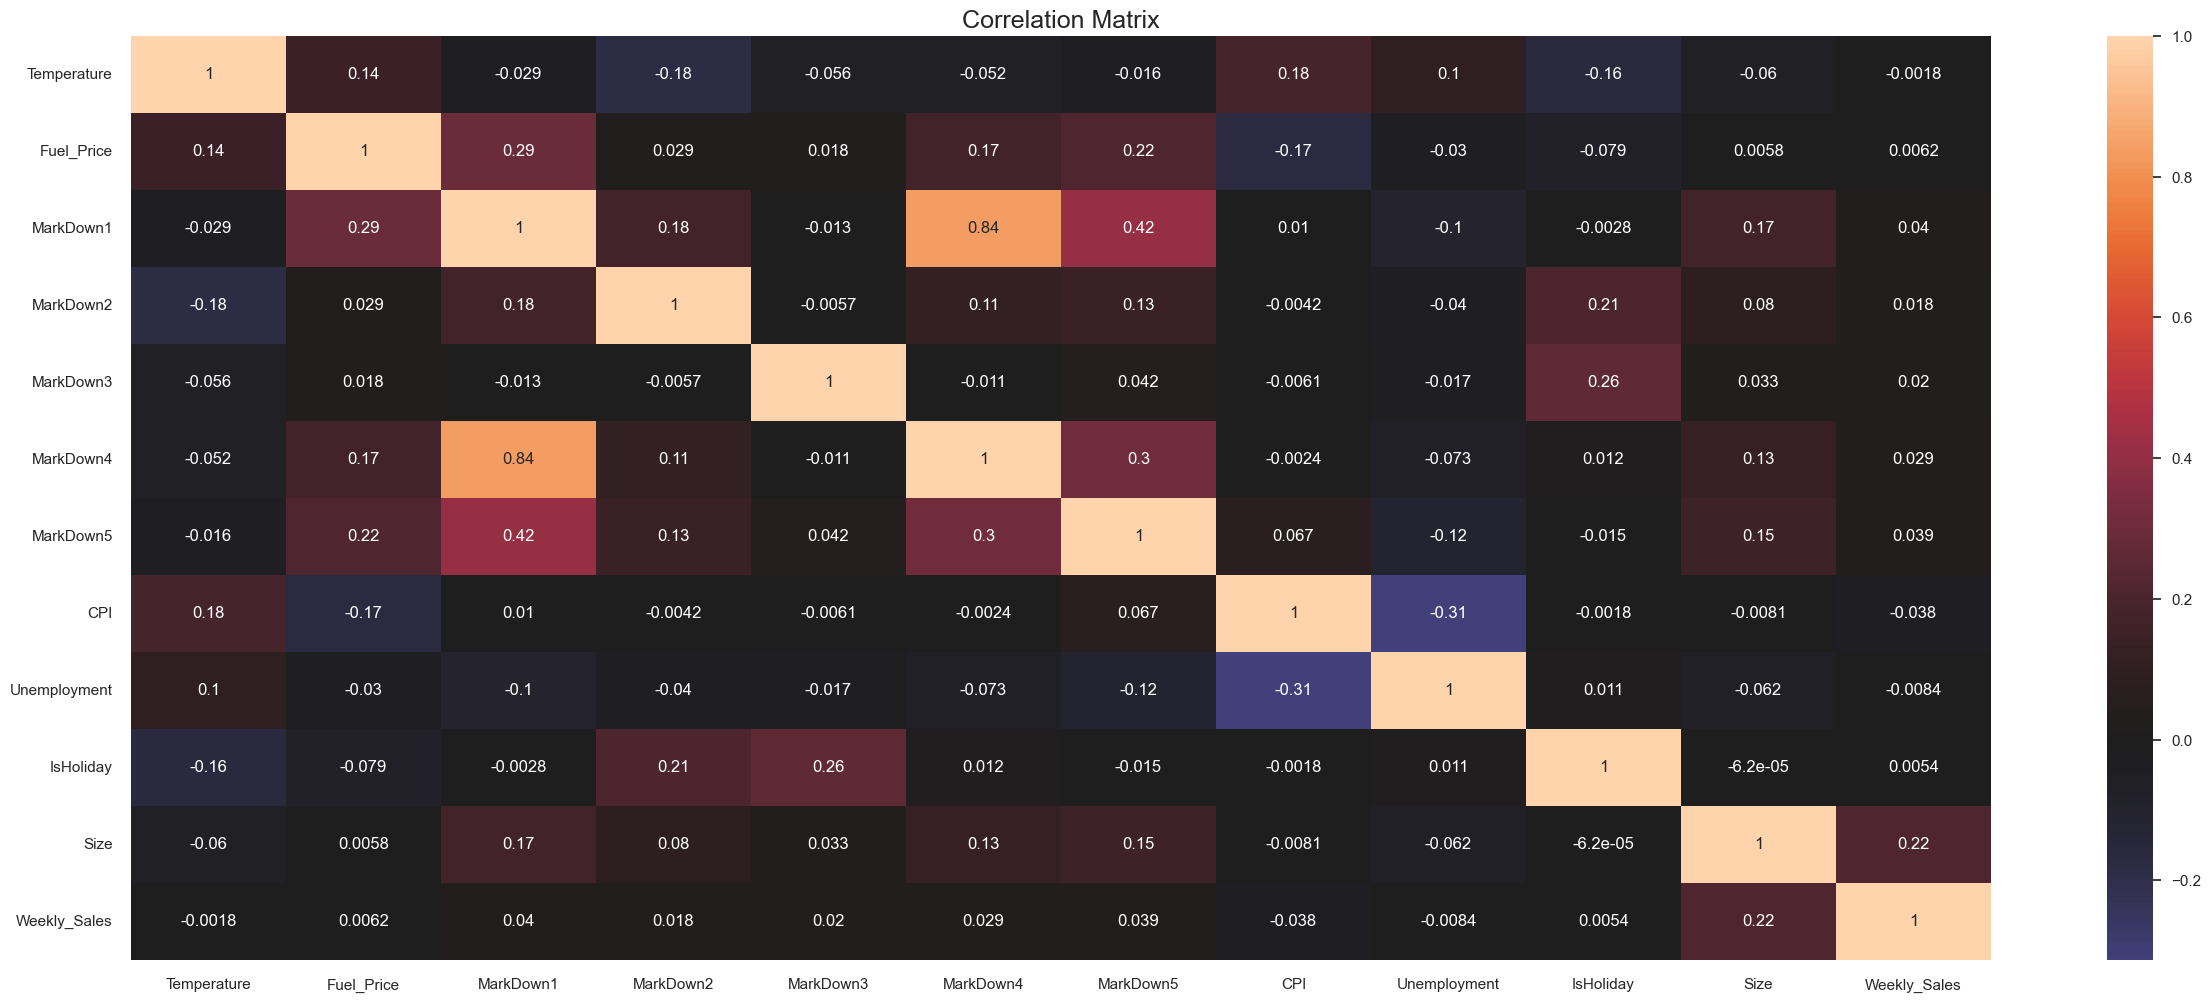

In [ ]:
plt.figure(figsize=(30,12))
sns.set(style = "white")
corr = dfcleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, annot = True, center=0)
plt.show()

Between MarkDown1 and MarkDown 4 have high corellation value. Drop one of it to prevent Multi Collinearity

In [ ]:
dfcorrelation=dfcleaned.copy()
dfcorrelation.head()

,Store,Date_tranx,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38
5,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,6,5749.03


In [ ]:
#Drop Markdown 4 for cause multi-collinearity and drop MarkDown 3, CPI, IsHoliday cause no correlation
dfcorrelation=dfcorrelation.drop(columns=['MarkDown3', 'MarkDown4', 'CPI','IsHoliday'])
dfcorrelation.head()

,Store,Date_tranx,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown5,Unemployment,Type,Size,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,1,24924.50
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,5,32229.38
5,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,6,5749.03


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\4167345042.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfcorrelation.corr()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12748\4167345042.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


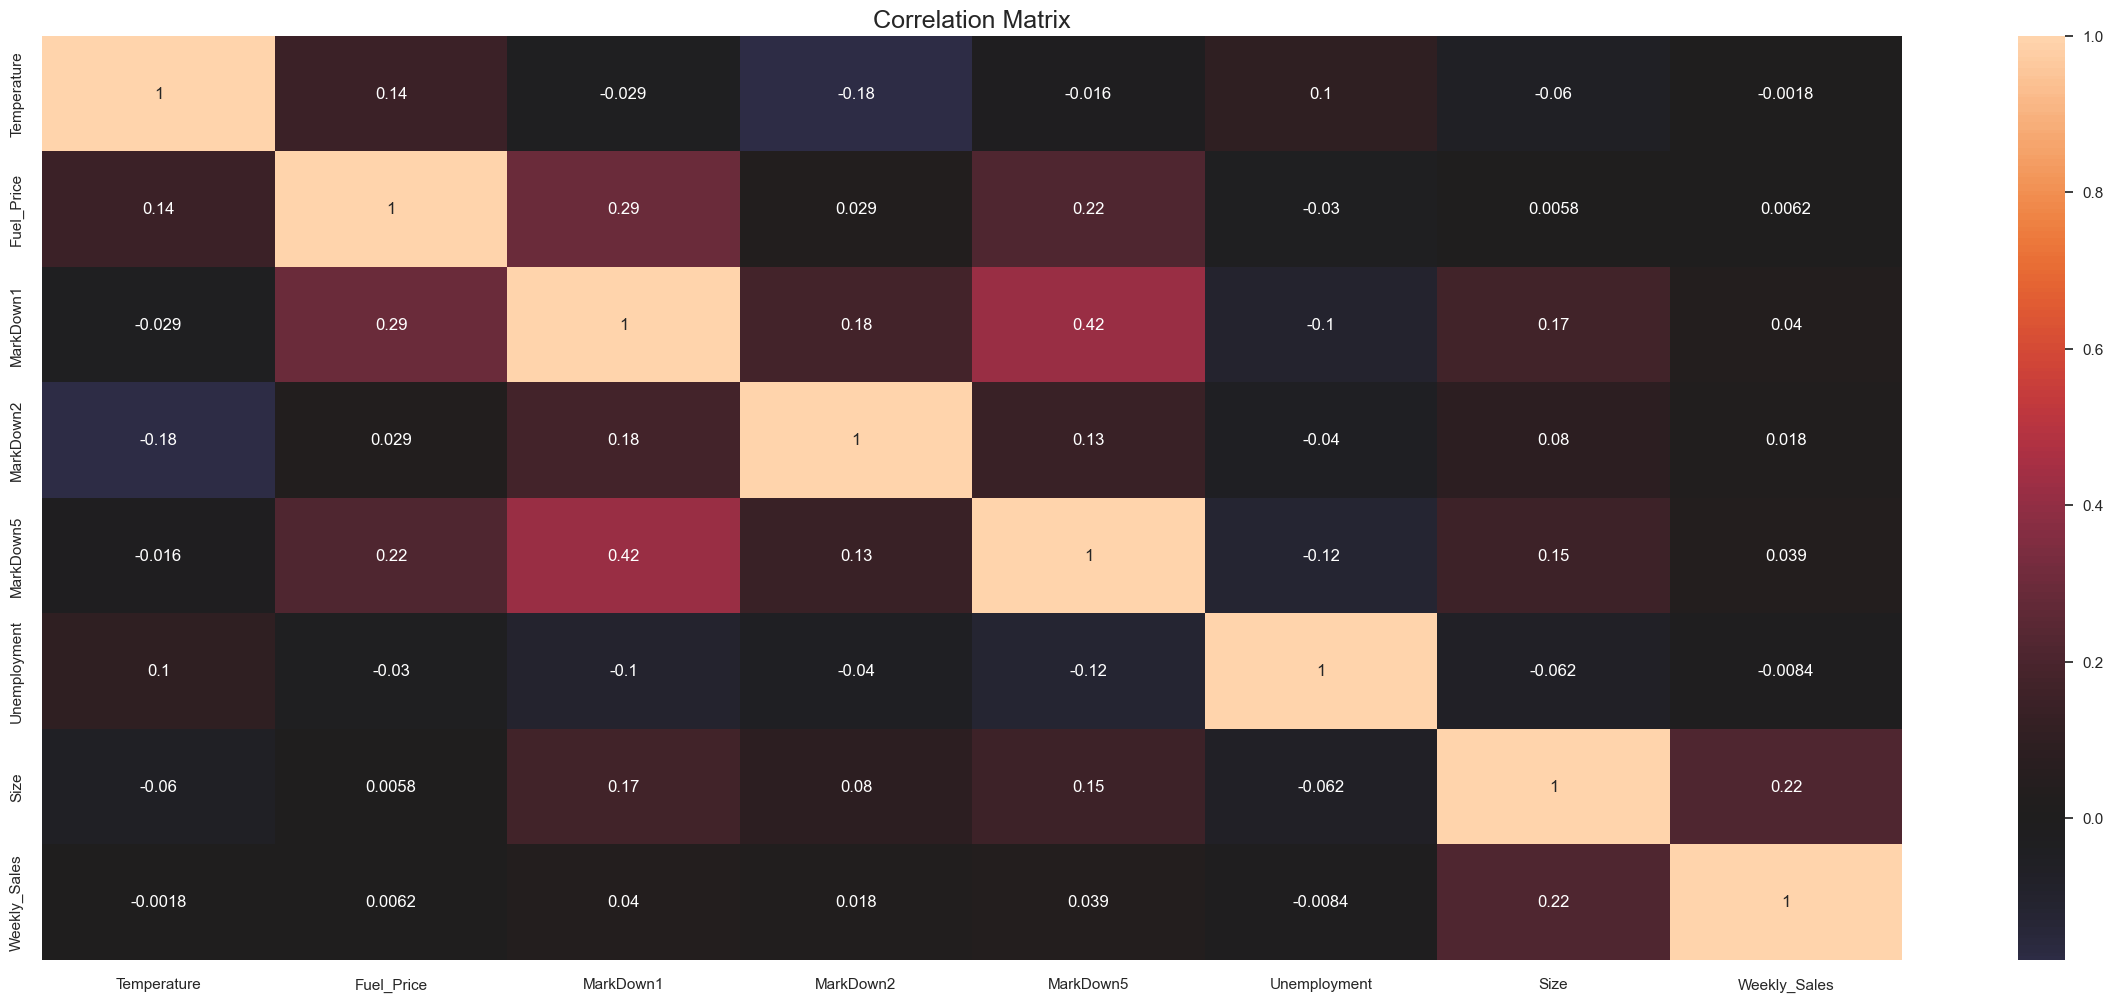

In [ ]:
plt.figure(figsize=(30,12))
sns.set(style = "white")
corr = dfcorrelation.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, annot = True, center=0)
plt.show()

# Prediction

In [ ]:
prediction_df= dfcorrelation.copy()
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385981 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         385981 non-null  object        
 1   Date_tranx    385981 non-null  datetime64[ns]
 2   Temperature   385981 non-null  float64       
 3   Fuel_Price    385981 non-null  float64       
 4   MarkDown1     385981 non-null  float64       
 5   MarkDown2     385981 non-null  float64       
 6   MarkDown5     385981 non-null  float64       
 7   Unemployment  385981 non-null  float64       
 8   Type          385981 non-null  object        
 9   Size          385981 non-null  int64         
 10  Dept          385981 non-null  object        
 11  Weekly_Sales  385981 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 38.3+ MB


In [ ]:
prediction_df['Month_Year']=prediction_df['Date_tranx'].dt.to_period('M')
prediction_df.head()

,Store,Date_tranx,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown5,Unemployment,Type,Size,Dept,Weekly_Sales,Month_Year
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,1,24924.50,2010-05
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,3,13740.12,2010-05
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,4,39954.04,2010-05
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,5,32229.38,2010-05
5,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,8.106,A,151315,6,5749.03,2010-05


In [ ]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385981 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         385981 non-null  object        
 1   Date_tranx    385981 non-null  datetime64[ns]
 2   Temperature   385981 non-null  float64       
 3   Fuel_Price    385981 non-null  float64       
 4   MarkDown1     385981 non-null  float64       
 5   MarkDown2     385981 non-null  float64       
 6   MarkDown5     385981 non-null  float64       
 7   Unemployment  385981 non-null  float64       
 8   Type          385981 non-null  object        
 9   Size          385981 non-null  int64         
 10  Dept          385981 non-null  object        
 11  Weekly_Sales  385981 non-null  float64       
 12  Month_Year    385981 non-null  period[M]     
dtypes: datetime64[ns](1), float64(7), int64(1), object(3), period[M](1)
memory usage: 41.2+ MB


In [ ]:
prediction= ['Month_Year', 'Weekly_Sales']
dfp= prediction_df[prediction]
dfp = dfp.groupby('Month_Year').sum()
dfp.head()

,Weekly_Sales
Month_Year,
2010-01,2.726947e+07
2010-02,1.152137e+08
2010-03,1.143547e+08
2010-04,1.133400e+08
2010-05,1.707078e+08


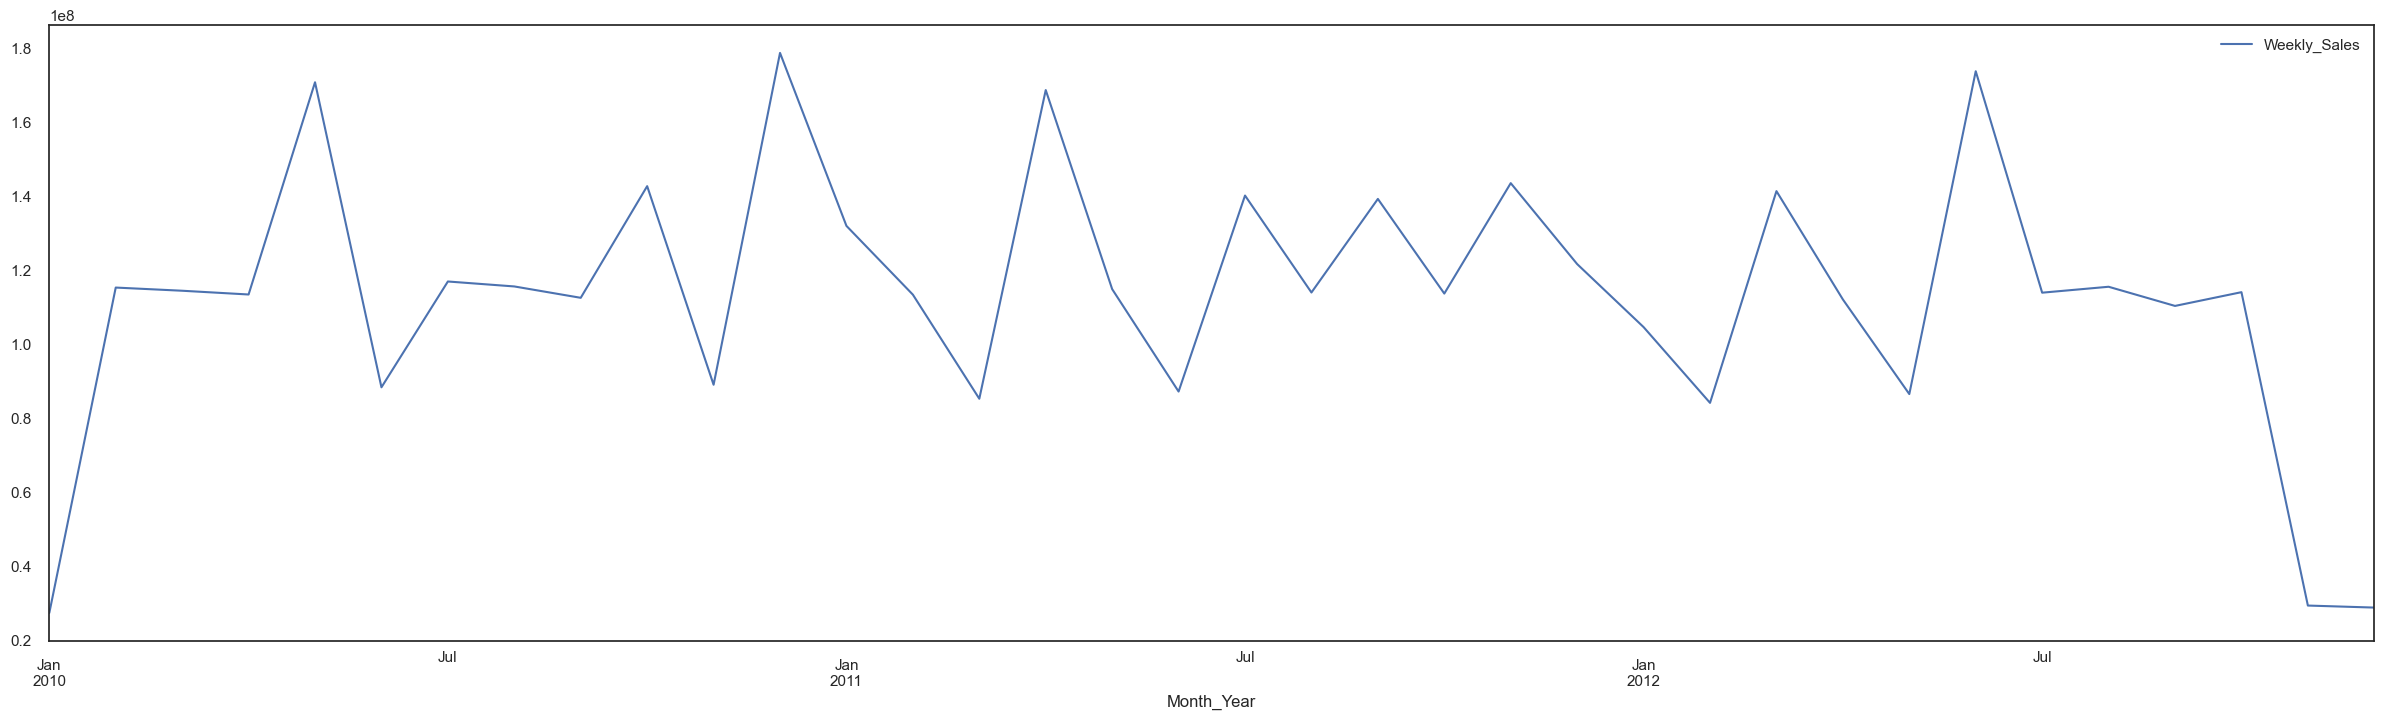

In [ ]:
dfp.plot(figsize=(30, 8))
plt.show()

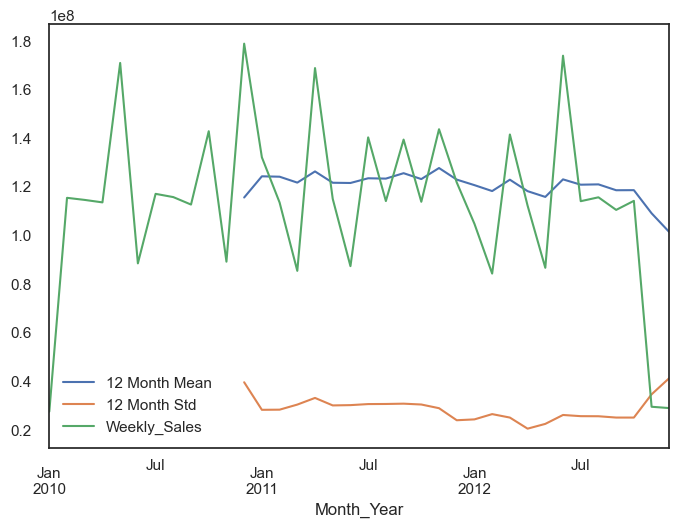

In [ ]:
#mean and standar deviation
timeseries = dfp ['Weekly_Sales']
timeseries.rolling(12).mean().plot(label='12 Month Mean')
timeseries.rolling(12).std().plot(label='12 Month Std')
timeseries.plot()
plt.legend()
plt.show()

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 36 entries, 2010-01 to 2012-12
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [ ]:
dfp.isna().sum()

Weekly_Sales    0
dtype: int64

<Figure size 800x550 with 0 Axes>

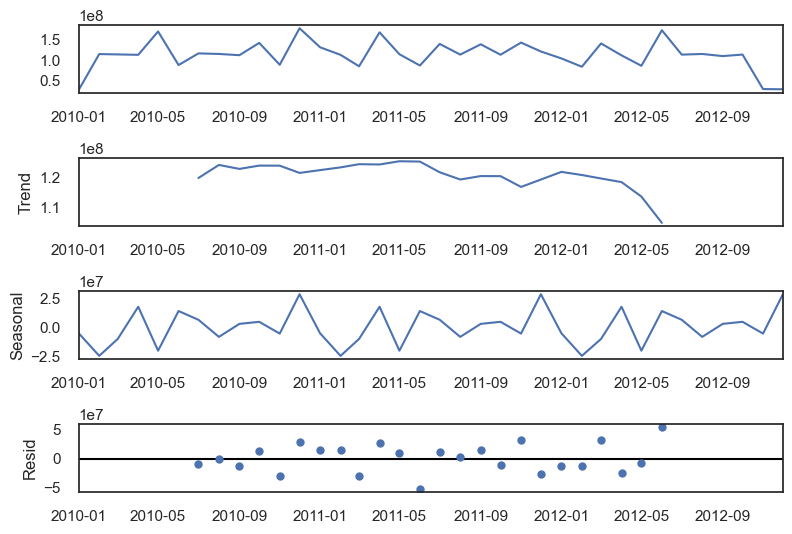

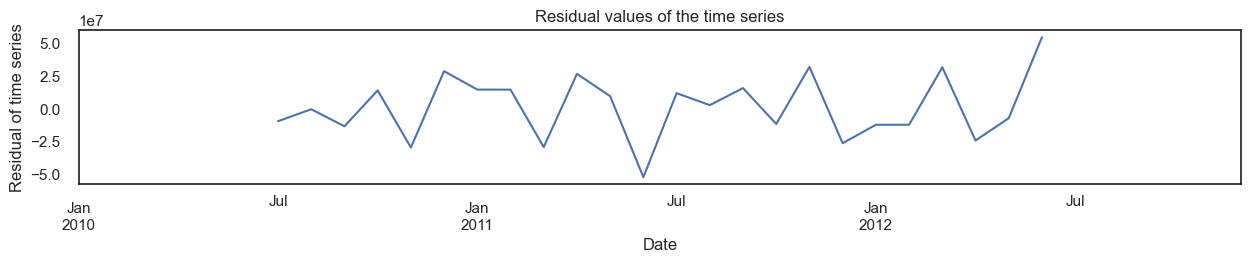

In [ ]:
#seasonal & residual
from statsmodels.tsa.seasonal import seasonal_decompose

dfp.interpolate(inplace = True)
dfp.index=dfp.index.to_timestamp()
decomposition = seasonal_decompose(dfp)
 
plt.figure()  
decomposition.plot()  
plt.show()

decomposition_residual=decomposition.resid
ax= decomposition_residual.plot(figsize=(15,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

In [ ]:
# Dickey-Fuller test (the data is stationary or not)
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

adf_test(dfp['Weekly_Sales'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.220099
p-value                         0.936083
#Lags Used                      8.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


Test for stationarity ADF: 
When the test statistic > the critical value, => we fail to reject the null hypothesis (which means the series is not stationary).
If the test statistic < the critical value, we can reject the null hypothesis (aka the series is stationary). 

** the result is test statistic > the critical value, so the data is non stationary **

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

kpss_test(dfp['Weekly_Sales'])

Results of KPSS Test:
Test Statistic           0.220557
p-value                  0.100000
Lags Used                0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\Users\LENOVO\miniconda3\envs\shav_\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test for stationarity KPSS: 
If the test statistic >  the critical value, => we reject the null hypothesis (series is not stationary). 
If the test statistic < the critical value, => if fail to reject the null hypothesis (series is stationary).

in the test result
test statistic < critical value, so the data is Stationary

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

Case 1: Both tests conclude that the series is not stationary - The series is not stationary

Case 2: Both tests conclude that the series is stationary - The series is stationary

Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

Here, due to the difference in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting.

## Difference Transforms

Results of Dickey-Fuller Test:
Test Statistic                 -1.035470
p-value                         0.740109
#Lags Used                      9.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


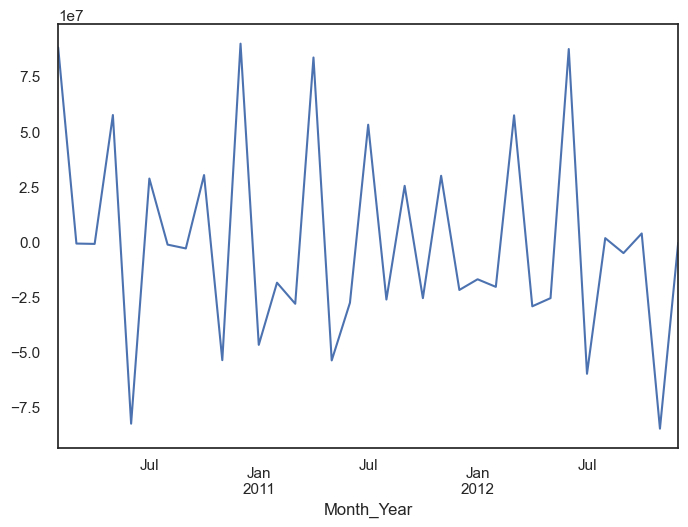

In [ ]:
dfp ['First Difference'] = dfp['Weekly_Sales'] - dfp['Weekly_Sales']. shift (1)
adf_test(dfp ['First Difference'].dropna())
dfp ['First Difference'].dropna().plot()
plt.show()

test statistic > critical value = not stationary

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

kpss_test(dfp ['First Difference'].dropna())

Results of KPSS Test:
Test Statistic            0.427753
p-value                   0.065193
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Test for stationarity: 
If the test statistic >  the critical value, => we reject the null hypothesis (series is not stationary). 
If the test statistic < the critical value, => if fail to reject the null hypothesis (series is stationary).

test statistic < critical value = stationary

## transformation 10th difference

Results of Dickey-Fuller Test:
Test Statistic                -6.276656e+00
p-value                        3.885739e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+01
Critical Value (1%)           -3.723863e+00
Critical Value (5%)           -2.986489e+00
Critical Value (10%)          -2.632800e+00
dtype: float64
Results of KPSS Test:
Test Statistic           0.450504
p-value                  0.055386
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


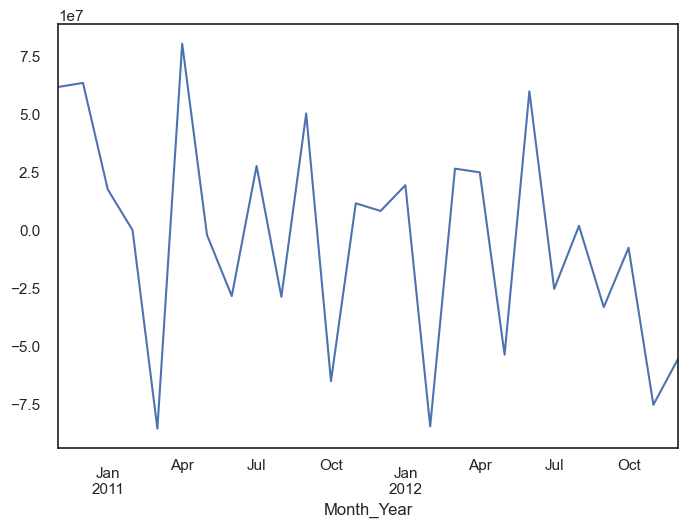

In [ ]:
dfp ['10 Difference'] = dfp['Weekly_Sales'] - dfp['Weekly_Sales']. shift (10)
adf_test(dfp ['10 Difference'].dropna())
kpss_test(dfp ['10 Difference'].dropna())
dfp ['10 Difference'].dropna().plot()
plt.show()

ADF.
test statistical < Critical = stationary

KPSS
test statistical < Critical = stationary

=> become strict stationary

## Autocorellation

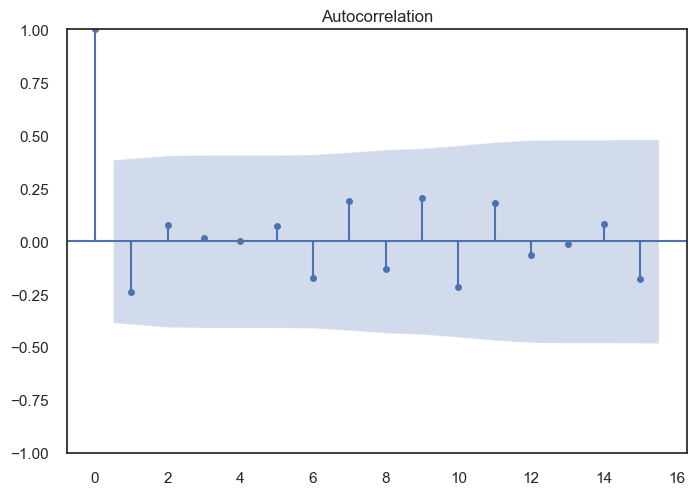

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig_ten = plot_acf(dfp ['10 Difference'].dropna())
plt.show()

if the line outside blue box -> high correlation (up = positive, down = negative).

Similar fluctuation means there's correlation

## Holt’s Linear Trend Model

In [ ]:
holtdf = dfp.copy()
holtdf.dropna(inplace = True)
holtdf.isna().sum()
holtdf.head(27)

,Weekly_Sales,First Difference,10 Difference
Month_Year,,,
2010-11-01,8.894521e+07,-53679517.27,61675736.43
2010-12-01,1.786437e+08,89698497.63,63430028.24
2011-01-01,1.318847e+08,-46758988.25,17529989.49
2011-02-01,1.132975e+08,-18587220.32,-42545.45
2011-03-01,8.516367e+07,-28133825.16,-85544103.49
2011-04-01,1.685976e+08,83433920.78,80343707.64
2011-05-01,1.147926e+08,-53805015.59,-2061803.10
2011-06-01,8.710519e+07,-27687385.04,-28411011.86
2011-07-01,1.400883e+08,52983137.11,27644825.71


In [ ]:
holtdf.isna().sum()

Weekly_Sales        0
First Difference    0
10 Difference       0
dtype: int64

In [ ]:
holtdf.rename(columns = {"Weekly_Sales" : "Sales"}, inplace = True)
holtdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2010-11-01 to 2012-12-01
Freq: MS
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             26 non-null     float64
 1   First Difference  26 non-null     float64
 2   10 Difference     26 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


### splitting data

take 3 last month for validation data

In [ ]:
Train=holtdf.loc['2011-11-01':'2012-10-01'] 
valid=holtdf.loc['2012-10-01':'2012-12-01']

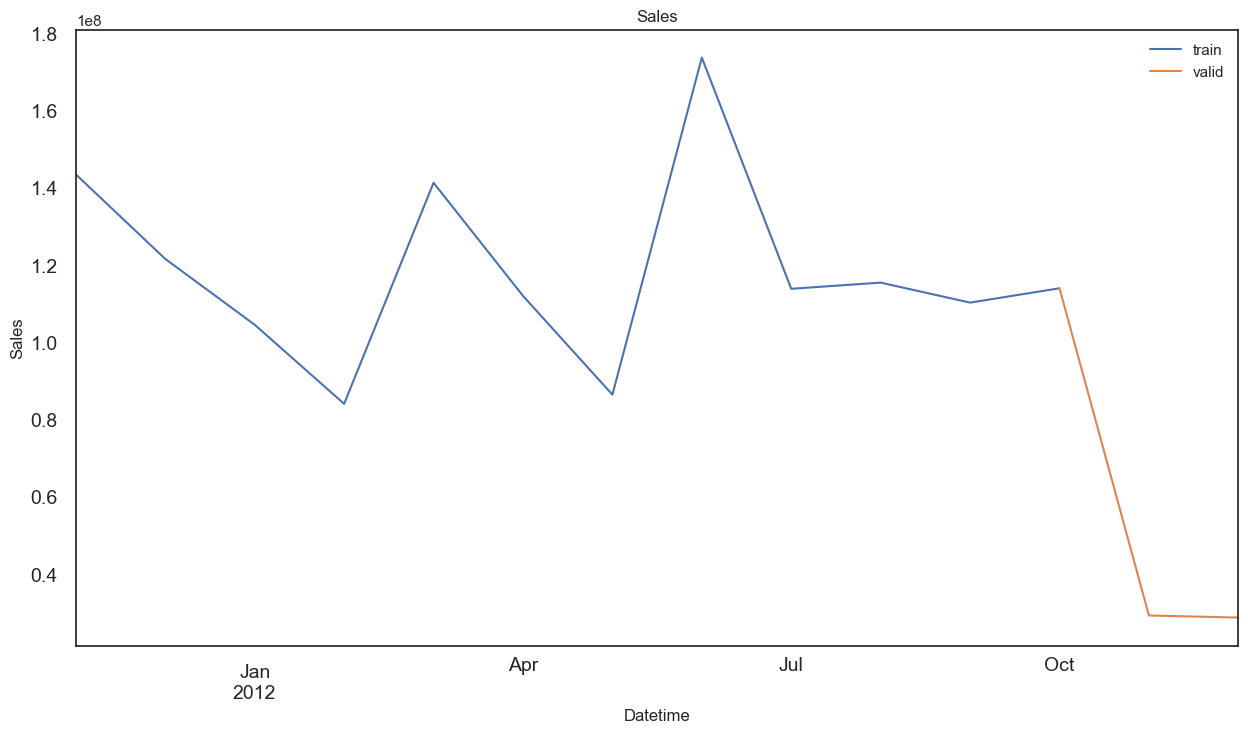

In [ ]:
Train['Sales'].plot(figsize=(15,8), title= 'Sales', fontsize=14, label='train') 
valid['Sales'].plot(figsize=(15,8), title= 'Sales', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Sales") 
plt.legend(loc='best') 
plt.show()

### Forcasting

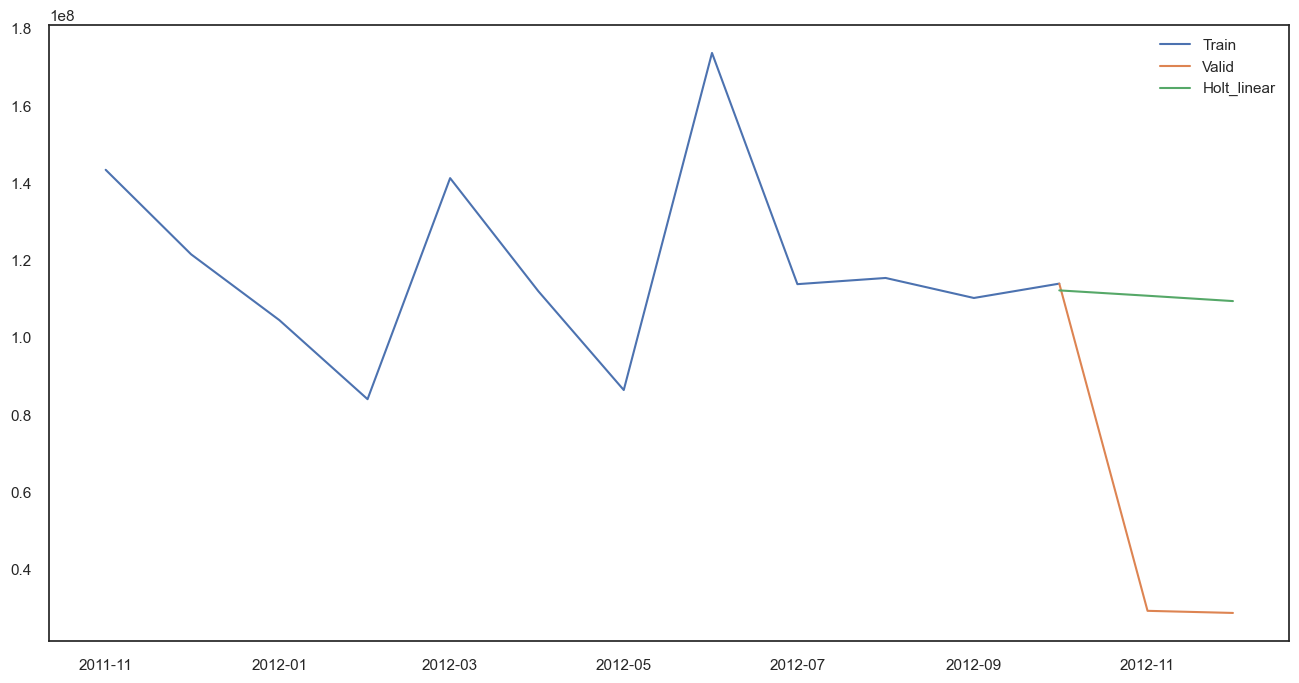

In [ ]:
from statsmodels.tsa.holtwinters import Holt

y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Sales'])).fit(smoothing_level = 0.3,
        smoothing_trend = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8))

plt.plot(Train['Sales'], label='Train')
plt.plot(valid['Sales'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid['Sales'], y_hat_avg['Holt_linear'])) 
print(rms)

66272048.79795211
